In [1]:
library(ggplot2)
library(stringr)
library(dplyr)
library(viridis)
library(ggbeeswarm)
library(ggpubr)
library(reshape2)
library(RColorBrewer)
library(shazam)
library(Seurat)
library(ggrastr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite



To cite the SHazaM package in publications, please use:

  Gupta N, Vander Heiden J, Uduman M, Gadala-Maria D, Yaari G,
  Kleinstein S (2015). “Change-O: a toolkit for analyzing large-scale B
  cell immunoglobulin repertoire sequencing data.” _Bioinformatics_,
  1-3. doi:10.1093/bioinformatics/btv359
  <https://doi.org/10.1093/bioinformatics/btv359>.

To cite the selection analysis methods, please use:

  Yaari G, Uduman M, Kleinstein S (2012). “Quantifying selection in
  high-throughput Immunoglobulin sequencing data sets.” _Nucleic acids
  research_, *40*(17), e134. doi:10.1093/nar/gks457
  <https://doi.org/10.1093/nar/gks457>.

To cite the HH_S5F model and the targeting model generation methods,
please use:

  Yaari G, Vander Heiden J, Uduman M,

In [7]:
sessionInfo()

R version 4.3.2 (2023-10-31)
Platform: aarch64-apple-darwin20 (64-bit)
Running under: macOS Sonoma 14.5

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRblas.0.dylib 
LAPACK: /Library/Frameworks/R.framework/Versions/4.3-arm64/Resources/lib/libRlapack.dylib;  LAPACK version 3.11.0

locale:
[1] C/UTF-8/C/C/C/C

time zone: America/New_York
tzcode source: internal

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
 [1] ggrastr_1.0.2      Seurat_5.0.1       SeuratObject_5.0.1 sp_2.1-3          
 [5] shazam_1.2.0       RColorBrewer_1.1-3 reshape2_1.4.4     ggpubr_0.6.0      
 [9] ggbeeswarm_0.7.2   viridis_0.6.5      viridisLite_0.4.2  dplyr_1.1.4       
[13] stringr_1.5.1      ggplot2_3.5.0     

loaded via a namespace (and not attached):
  [1] RcppAnnoy_0.0.22            splines_4.3.2              
  [3] later_1.3.2                 pbdZMQ_0.3-11              
  [5

In [2]:
jz.checkgene = function(srat,gene){
    genes = rownames(srat)
    genes[startsWith(genes,gene)]
}


In [3]:
jz.save.umap.coord <- function(object) {
    # saves the UMAP embedding to the metadata 
    umapCoord <- as.data.frame(Embeddings(object = object[["umap"]]))
    object@meta.data$UMAP1 = umapCoord$umap_1
    object@meta.data$UMAP2 = umapCoord$umap_2
    return(object)
}

In [4]:
Axis_themes <- theme(plot.title = element_text(size = 8),
                     axis.title = element_text(size = 8,colour = "black"), 
                     axis.text = element_text(size = 8,colour = "black"),
                     axis.text.x = element_text(size = 8),
                     legend.text = element_text(size =8),
                     legend.title = element_text(size = 8),
                     legend.key.size = unit(.3, 'cm'),
                     strip.text.x = element_text(size = 8), 
                    axis.line = element_line(linewidth = .355), 
                    axis.ticks = element_line(linewidth = .177))
UMAP_theme <- theme_bw()+theme(axis.text.y = element_blank(), 
                               axis.text.x = element_blank(), 
                               axis.ticks.x= element_blank(),
                               axis.ticks.y= element_blank(),
                               axis.title.x= element_blank(),
                               axis.title.y= element_blank(),
                               strip.text.x = element_text(size = 8),
                               panel.grid.major = element_blank(),
                               panel.grid.minor = element_blank(),
                               panel.border = element_blank(),
                               panel.background = element_rect(colour = "black", fill = NA,linewidth=.355),
                               legend.position = "none",
                               plot.title = element_text(hjust = 0.5, size = 8))

In [5]:
srat = readRDS('seurat_objects/04_10x_figure_ready_300.RDS')
srat

An object of class Seurat 
21228 features across 51751 samples within 1 assay 
Active assay: RNA (21228 features, 2000 variable features)
 3 layers present: data, counts, scale.data
 2 dimensional reductions calculated: pca, umap

In [6]:
# label column is used for plotting 
srat$label = as.character(srat$bcelltype )
srat$label[srat$label=='Memory B cell'] = 'MBC'
srat$label[srat$label == 'Plasmablast'] = 'PB'
srat$label = factor(srat$label,levels= rev(c('Non-B cell','Naive B cell','MBC','PB')))

In [7]:
table(srat$label)


          PB          MBC Naive B cell   Non-B cell 
          62         6737        18895        26057 

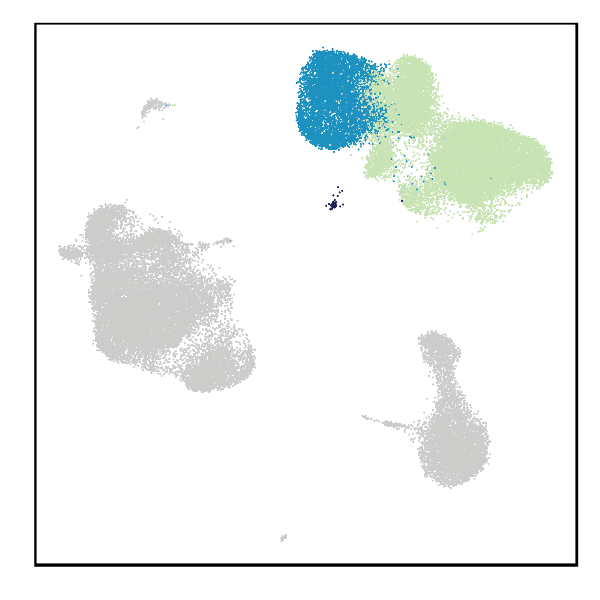

In [78]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)
metadata = srat@meta.data
metadata$bcelltype = factor(metadata$bcelltype,levels=c('Non-B cell','Naive B cell','Memory B cell','Plasmablast'))
metadata %>% #arrange(bcelltype) %>%
ggplot(aes(x=UMAP1, y=UMAP2,color=bcelltype))+ 
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
scale_color_manual(values = c('#CCCCCB','#C8E3B4','#1D91C0','#1E2456')) +
labs(color='Cell Type') +
UMAP_theme

out = 'figures/10x_3p_uamp_celltype.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

Warning message:
“Scaling data with a low number of groups may produce misleading results”
Scale for colour is already present.
Adding another scale for colour, which will replace the existing scale.


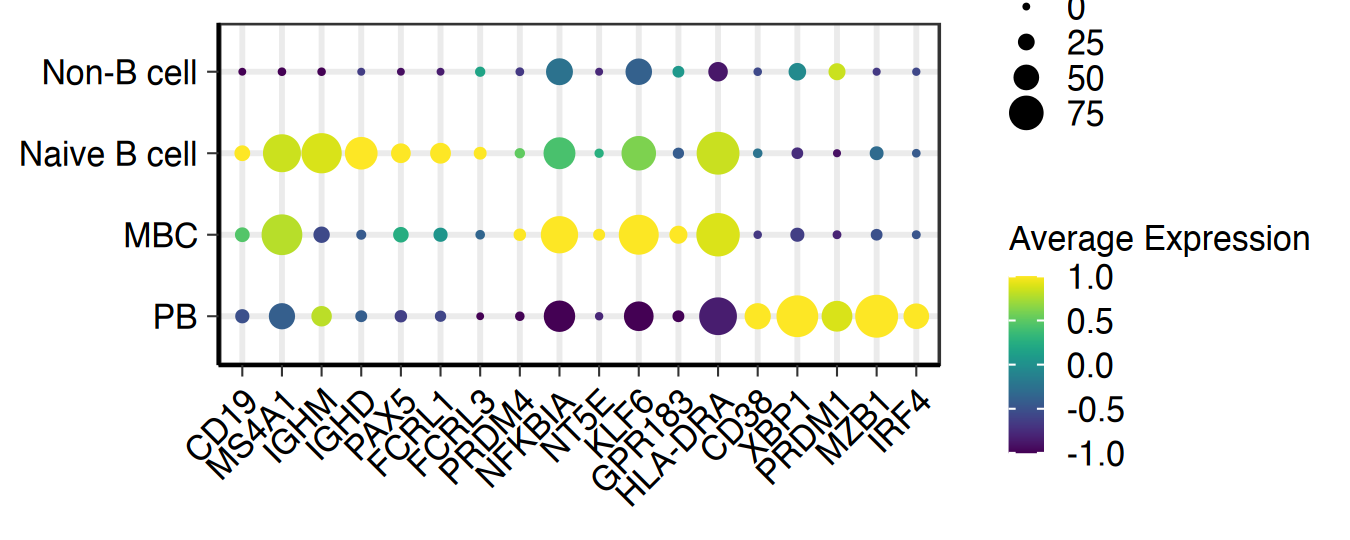

In [79]:
options(repr.plot.width = 4.5, repr.plot.height = 1.8,repr.plot.res=300)
Idents(srat)='label'

genes = c('CD19', 'MS4A1', "IGHM", 'IGHD', 'PAX5', 'FCRL1', 'FCRL3','PRDM4', 
          'NFKBIA', 'NT5E', 'KLF6', 'GPR183','HLA-DRA', 'CD38', 'XBP1', 'PRDM1', 'MZB1', 'IRF4')  

DotPlot(srat,col.min = -1, col.max = 1, features=unique(genes),dot.min = 0,dot.scale = 4) + 
scale_color_viridis() + 
labs(x='',y='') + 
#scale_size_continuous()+
theme_bw()  + 
Axis_themes + 
theme(legend.key.size = unit(.3, 'cm'), 
      axis.title = element_blank(), 
      axis.text.x = element_text(size = 8, hjust = 1, angle = 45)) 


out = 'figures/10x_3p_dotplot_celltype.pdf'
ggsave(out,device='pdf', width = 4.5, height = 1.8,useDingbats = FALSE)

In [6]:
# build dataframe for ploting 
metadata = srat@meta.data
metadata = metadata %>% mutate(none = ifelse(Recovery==0,1,0),
                               heavy = ifelse(heavy.recovery==1,1,0), 
                               light = ifelse(light.recovery==1,1,0),
                               paired = ifelse(Recovery==3,1,0)
                              )
# different b cell types 
none = metadata %>% count(orig.ident,label,none) %>% group_by(orig.ident,label) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(none==1) 
heavy = metadata %>% count(orig.ident,label,heavy) %>% group_by(orig.ident,label) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(heavy==1)
light = metadata %>% count(orig.ident,label,light) %>% group_by(orig.ident,label) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(light==1)
paired = metadata %>% count(orig.ident,label,paired) %>% group_by(orig.ident,label) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(paired==1)
df1 = none %>% rename('recovery'='none') %>% mutate(recovery='None')
df2 = heavy %>% rename('recovery'='heavy') %>% mutate(recovery='Heavy')
df3 = light %>% rename('recovery'='light') %>% mutate(recovery='Light')
df4 = paired %>% rename('recovery'='paired') %>% mutate(recovery='Paired')

bcells = rbind(df1,df2, df3, df4) 

# all b cells 
none = metadata %>% filter(label!='Non-B cell') %>% count(orig.ident,none) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(none==1) 
heavy = metadata %>% filter(label!='Non-B cell') %>% count(orig.ident,heavy) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(heavy==1)
light = metadata %>% filter(label!='Non-B cell') %>% count(orig.ident,light) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(light==1)
paired = metadata %>% filter(label!='Non-B cell') %>% count(orig.ident,paired) %>% group_by(orig.ident) %>% mutate(ncell = sum(n),frac=n/ncell) %>% filter(paired==1)
df1 = none %>% rename('recovery'='none') %>% mutate(recovery='None')
df2 = heavy %>% rename('recovery'='heavy') %>% mutate(recovery='Heavy')
df3 = light %>% rename('recovery'='light') %>% mutate(recovery='Light')
df4 = paired %>% rename('recovery'='paired') %>% mutate(recovery='Paired')

all.bcell = rbind(df1,df2, df3, df4) 
all.bcell$label = 'All B cells'

# combine them 
df4gg = rbind(bcells,all.bcell)

# calculate stats
df4gg2 = df4gg %>% group_by(recovery,label) %>% 
summarize(mean.frac= mean(frac),sd.frac=sd(frac),se.frac=sd.frac/sqrt(n())) %>% replace(is.na(.),0)

df4gg = df4gg %>% ungroup() %>% tidyr::complete(orig.ident,recovery,label) %>% replace(is.na(.),0)
df4gg2 = df4gg2 %>% ungroup() %>% tidyr::complete(recovery,label) %>% replace(is.na(.),0)

`summarise()` has grouped output by 'recovery'. You can override using the
`.groups` argument.


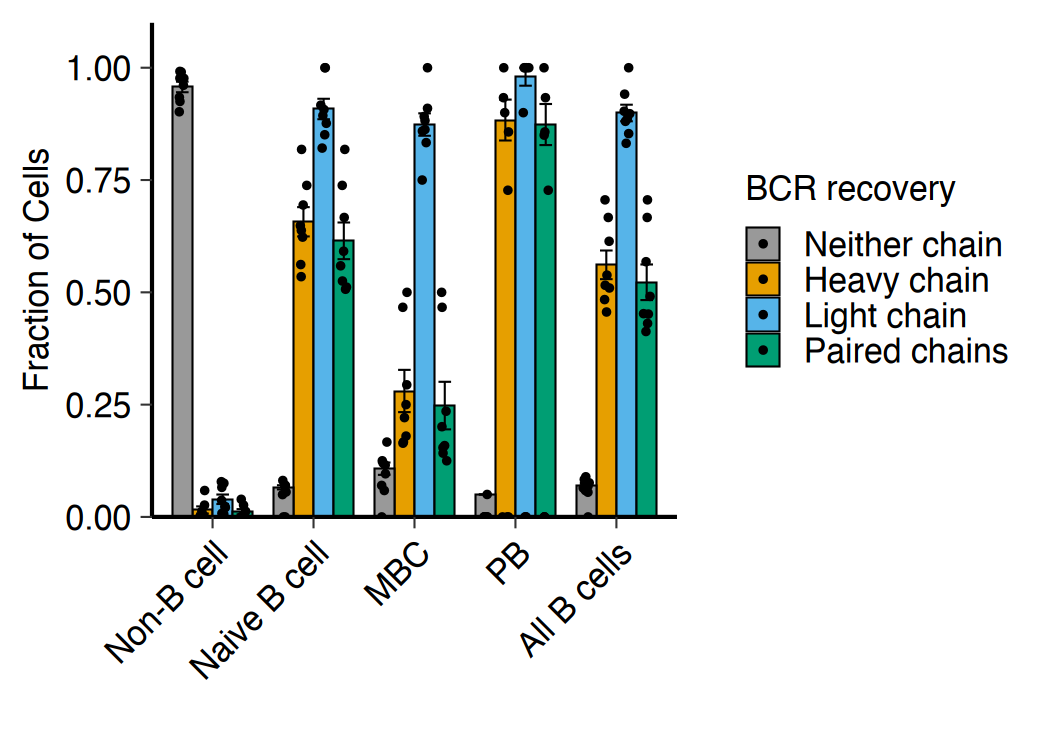

In [16]:
# bar plot 
df4gg2$recovery = factor(df4gg2$recovery,levels=c('None','Heavy','Light','Paired'))
df4gg$recovery = factor(df4gg$recovery,levels=c('None','Heavy','Light','Paired'))

options(repr.plot.width=3.5,repr.plot.height=2.5,repr.plot.res=300)

df4gg$label = factor(df4gg$label,levels=c('Non-B cell','Naive B cell','MBC','PB','All B cells'))
df4gg2$label = factor(df4gg2$label,levels=c('Non-B cell','Naive B cell','MBC','PB','All B cells'))

dodgewidth=0.8
df4gg2 %>% 
ggplot(aes(x=label,y=mean.frac,fill=recovery)) + theme_classic()+ 
geom_bar(stat='identity',position='dodge',color='black',
         linewidth=0.177,width=dodgewidth) + 
geom_errorbar(aes(ymin = mean.frac-se.frac, ymax = mean.frac+se.frac),linewidth = .177,
              width = .5, position = position_dodge(width = dodgewidth))+
geom_point(data=df4gg, aes(x=label, y=frac), size= .2, color = 'black',
           position = position_jitterdodge(dodge.width = dodgewidth, jitter.width = .2))+
labs(x='',y='Fraction of Cells',fill='BCR recovery') + 
scale_y_continuous(expand=c(0,0),limits = c(0,1.1)) +
scale_fill_manual(values = c("#999999", "#E69F00", "#56B4E9", "#009E73"),
                  label=c('Neither chain','Heavy chain','Light chain','Paired chains')) +
Axis_themes +
theme(axis.text.x=element_text(angle=45,hjust=1))

out = 'figures/celltype_bcr_recovery_barplot.pdf'
ggsave(out,device='pdf', height = 2.5, width = 3.5,
       dpi = 300,useDingbats = FALSE)

In [16]:
df4gg2 %>% filter(label =='All B cells')

recovery,label,mean.frac,sd.frac,se.frac
<fct>,<fct>,<dbl>,<dbl>,<dbl>
Heavy,All B cells,0.56124758,0.09027866,0.03191833
Light,All B cells,0.89928736,0.05222658,0.01846488
None,All B cells,0.07074512,0.01271051,0.00480412
Paired,All B cells,0.52243691,0.11202707,0.03960755


In [20]:
df4gg %>% filter(label =='MBC',recovery=='Heavy')

orig.ident,recovery,label,n,ncell,frac
<chr>,<fct>,<fct>,<int>,<int>,<dbl>
H1,Heavy,MBC,323,1937,0.1667527
H2,Heavy,MBC,332,1845,0.1799458
H3,Heavy,MBC,394,1782,0.2210999
H4,Heavy,MBC,185,1127,0.1641526
H5,Heavy,MBC,3,6,0.5000000
H6,Heavy,MBC,7,15,0.4666667
H7,Heavy,MBC,5,17,0.2941176
H8,Heavy,MBC,2,8,0.2500000


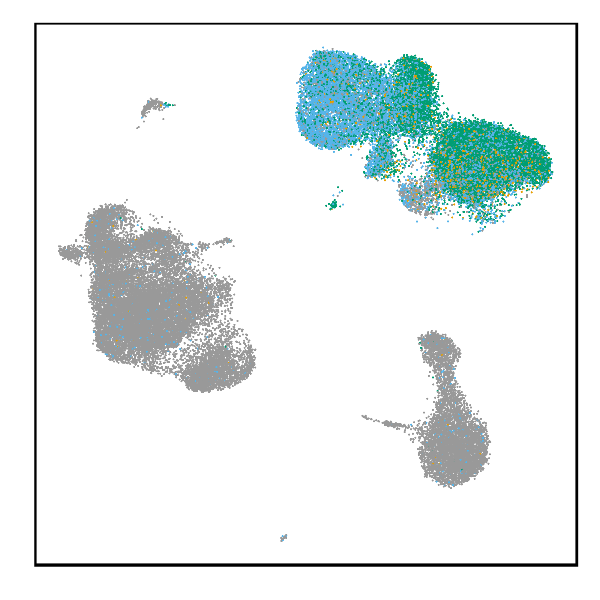

In [15]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)
# 300 nFeature_RNA
metadata = srat@meta.data

metadata %>% #arrange(Recovery) %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=factor(Recovery)))+ theme_void()+ #NoLegend()+
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
scale_color_manual(values = c("#999999", "#E69F00", "#56B4E9", "#009E73"),
                   labels=c('No recovery','Heavy chain only','Light chain only','Paired chains')) +
labs(color='')+
guides(color = guide_legend(override.aes = list(size = 4))) +
UMAP_theme

out = 'figures/10x_3p_uamp_recovery.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

In [16]:
# heavy chain 
df = FetchData(srat,jz.checkgene(srat,'IGH'),slot='count') %>% mutate(cell.id=rownames(.))
df$cell.id = str_split_i(df$cell.id, '-',1)
igh = df %>% melt(id.vars = 'cell.id',variable.name = 'vgene',value.name = 'count') %>% 
group_by(cell.id) %>% summarize(total.count=sum(count))
igh$label = srat$label[match(igh$cell.id,srat$cell.id)]
igh$label = factor(igh$label,levels=c('Non-B cell','Naive B cell','MBC','PB'))
# light chain 
df = FetchData(srat,c(jz.checkgene(srat,'IGKC'),jz.checkgene(srat,'IGLC')),slot='count') %>% mutate(cell.id=rownames(.))
df$cell.id = str_split_i(df$cell.id, '-',1)
igl = df %>% melt(id.vars = 'cell.id',variable.name = 'vgene',value.name = 'count') %>% 
group_by(cell.id) %>% summarize(total.count=sum(count))
igl$label = srat$label[match(igl$cell.id,srat$cell.id)]
igl$label = factor(igl$label,levels=c('Non-B cell','Naive B cell','MBC','PB'))

Warning message:
“The `slot` argument of `FetchData()` is deprecated as of SeuratObject 5.0.0.
ℹ Please use the `layer` argument instead.”


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”
Warning message:
“The `<scale>` argument of `guides()` cannot be `FALSE`. Use "none" instead as
of ggplot2 3.3.4.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”
Warning message:
“`position_dodge()` requires non-overlapping x intervals.”


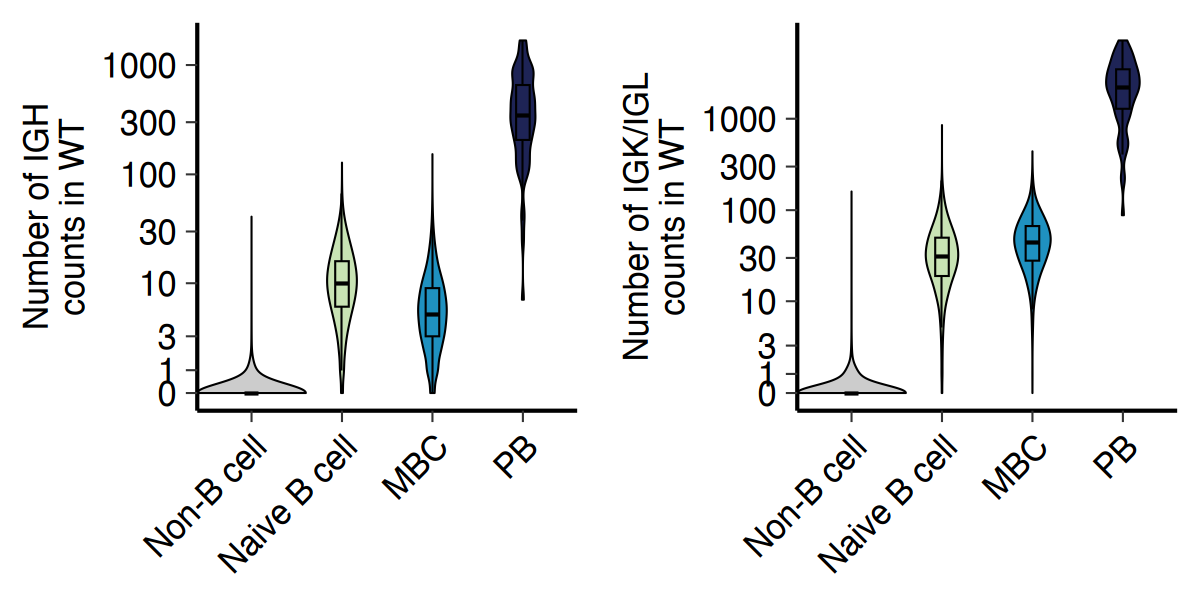

In [17]:
options(repr.plot.res = 300, repr.plot.width = 4,repr.plot.height=2)
cluster_palette = c('Non-B cell'='#CCCCCC','Naive B cell'='#C8E3B4',
                    'MBC'='#1F91C0','PB'='#1E2456')

g1 = ggplot(igh, aes(x = label, y = total.count, fill = label)) + 
geom_violin(color = 'black', size = .177, width= 1.2, bw = .1, adjust = 2)  +
geom_boxplot(width = .15, outlier.size = 0, size = .177, color = 'black',  outlier.shape = NA) + 
labs(x = c(), y = 'Number of IGH\ncounts in WT') + 
scale_y_continuous(trans = scales::pseudo_log_trans(sigma = 1, base = exp(1)), 
                   breaks = c(0,1, 3, 10, 30, 100, 300,1000)) + 
scale_fill_manual(values = cluster_palette) + guides(fill = FALSE) + 
theme_classic() + 
Axis_themes + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) 


g2 = ggplot(igl, aes(x = label, y = total.count, fill = label)) +
geom_violin(color = 'black', size = .177, width= 1.2, bw = .1, adjust = 2)  +
geom_boxplot(width = .15, outlier.size = 0, size = .177, color = 'black',  outlier.shape = NA, fill = NA) + 
labs(x = c(), y = 'Number of IGK/IGL\ncounts in WT')+ 
scale_y_continuous(trans = scales::pseudo_log_trans(sigma = 1, base = exp(1)), 
                   breaks = c(0,1, 3, 10, 30, 100, 300,1000)) + 
scale_fill_manual(values = cluster_palette) + guides(fill = FALSE) + 
theme_classic() + 
Axis_themes + 
theme(axis.text.x = element_text(angle = 45, hjust = 1)) 

cowplot::plot_grid(g1, g2)
out = 'figures/10x_3p_pheno_bcr_counts.pdf'
ggsave(out,device='pdf', height = 2, width = 4,
       dpi = 300,useDingbats = FALSE)

In [18]:
# heavy chain
df = FetchData(srat,c(jz.checkgene(srat,'IGH')),slot='count') %>% 
mutate(cell.id=rownames(.))
df$cell.id = str_split_i(df$cell.id, '-',1)
df4gg = df %>% melt(id.vars = 'cell.id',variable.name = 'vgene',value.name = 'count') %>% 
group_by(cell.id) %>% summarize(total.count=sum(count))
df4gg$label = srat$label[match(df4gg$cell.id,srat$cell.id)]

igh=df4gg %>% filter(label=='Non-B cell')%>% 
mutate(count = ifelse(total.count>0,'1+','0'),
       recovery=ifelse(cell.id %in% heavy.bcr$cell.id, 'Recovery', 'No Recovery'))

# light chain
df = FetchData(srat,c(jz.checkgene(srat,'IGK'),jz.checkgene(srat,'IGL')),slot='count') %>% 
mutate(cell.id=rownames(.))
df$cell.id = str_split_i(df$cell.id, '-',1)
df4gg = df %>% melt(id.vars = 'cell.id',variable.name = 'vgene',value.name = 'count') %>% 
group_by(cell.id) %>% summarize(total.count=sum(count))
df4gg$label = srat$label[match(df4gg$cell.id,srat$cell.id)]

igl=df4gg %>% filter(label=='Non-B cell')%>% 
mutate(count = ifelse(total.count>0,'1+','0'),
       recovery=ifelse(cell.id %in% light.bcr$cell.id, 'Recovery', 'No Recovery'))

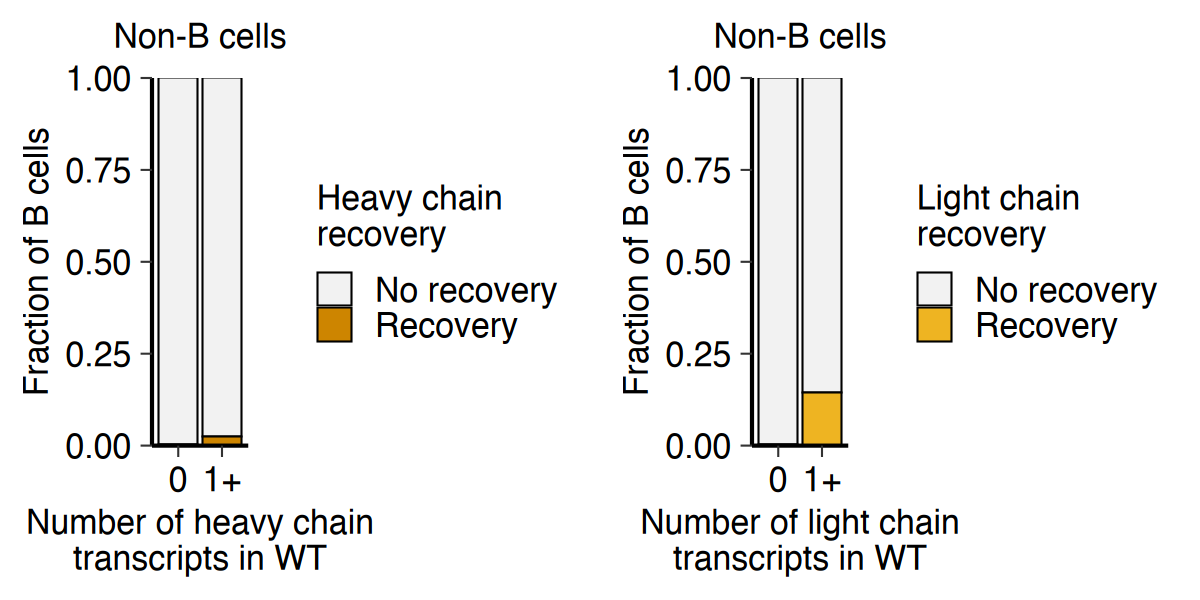

In [19]:
options(repr.plot.res = 300, repr.plot.width = 4,repr.plot.height=2)
g1 = ggplot(igh, aes(x = count, fill = factor(recovery))) + 
geom_bar(position = 'fill', color = 'black', linewidth = .177)+ 
scale_fill_manual(values = rev(c('orange3', 'grey95')), 
                  labels = c('No recovery', 'Recovery'))  + 
theme_classic() + Axis_themes + 
scale_y_continuous(expand = c(0,0))+
labs(x =  c('Number of heavy chain\ntranscripts in WT'), 
     y = 'Fraction of B cells', fill = 'Heavy chain  \nrecovery') + 
theme(legend.key.size = unit(.3, 'cm'), 
      plot.title = element_text(hjust = .5)) + 
ggtitle('Non-B cells')

g2 = ggplot(igl, aes(x = count, fill = factor(recovery))) + 
geom_bar(position = 'fill', color = 'black', linewidth = .177)+ 
scale_fill_manual(values = rev(c('goldenrod2', 'grey95')), 
                  labels = c('No recovery', 'Recovery'))  + 
theme_classic() + Axis_themes + 
scale_y_continuous(expand = c(0,0))+
labs(x = c('Number of light chain\ntranscripts in WT'), 
     y = 'Fraction of B cells', fill = 'Light chain  \nrecovery') + 
theme(legend.key.size = unit(.3, 'cm'), 
      plot.title = element_text(hjust = .5)) + 

ggtitle('Non-B cells')
cowplot::plot_grid(g1, g2)

out = 'figures/10x_3p_nonbcells.pdf'
ggsave(out,device='pdf', height = 2, width = 4,
       dpi = 300,useDingbats = FALSE)

In [39]:
# correlation plot 
bcell.srat = subset(srat, celltype %in% c('Naive B cell','Memory B cell','Plasmablast') )
# igh 
df4gg = FetchData(bcell.srat,slot='count',
                  c('IGHM','IGHD','IGHG4','IGHG2','IGHG1','IGHG3','IGHA1','IGHA2','IGHE')   )
df4gg$WTA = apply(df4gg, 1, max)
# get scVDJ umis
df4gg$VDJ = srat$heavy.umi[match(rownames(df4gg), rownames(srat@meta.data))]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igh = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGH')

# igk
df4gg = FetchData(bcell.srat,slot='count',
                  jz.checkgene(srat,'IGKC')  )
df4gg$WTA = apply(df4gg, 1, max)
# get scVDJ umis
df4gg$VDJ = srat$light.umi[match(rownames(df4gg), rownames(srat@meta.data))]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igk = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGK') #%>% filter(WTA<1500)

# igl 
df4gg = FetchData(bcell.srat,slot='count',
                  jz.checkgene(srat,'IGLC') )
df4gg$WTA = apply(df4gg, 1, max)
# get scVDJ umis
df4gg$VDJ = srat$light.umi[match(rownames(df4gg), rownames(srat@meta.data))]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0
igl = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGL') #%>% filter(WTA<1500)

Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in geom_abline(slope = 1, yintercept = 0, linetype = "dashed", color = "red", :
“Ignoring unknown parameters: `yintercept`”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”


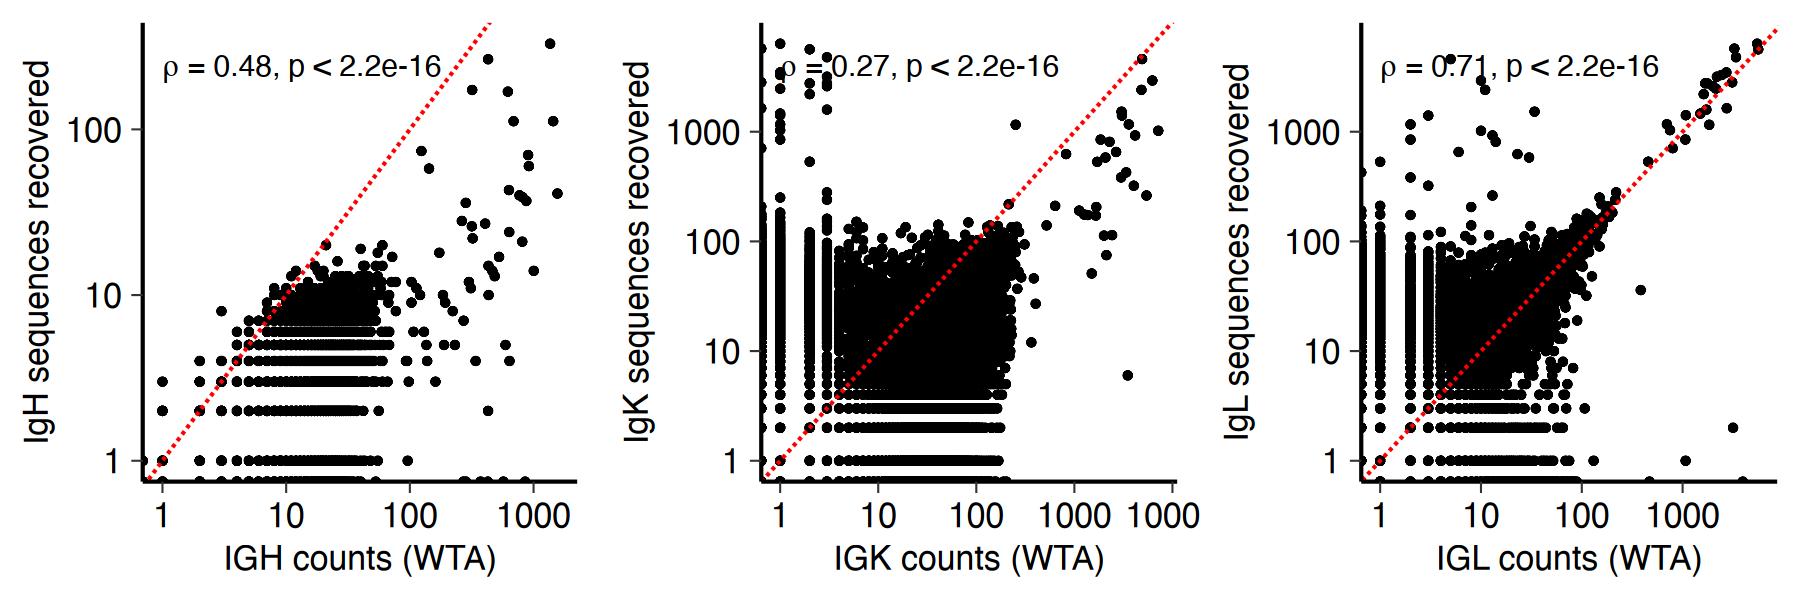

In [40]:
options(repr.plot.width = 6, repr.plot.height = 2, repr.plot.res = 300)

library(ggpubr)
g1 = ggplot(igh, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes + labs(x = 'IGH counts (WTA)', y  = 'IgH sequences recovered') + stat_cor(data = igh %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g1$layers[[2]]$aes_params$textsize <- 3

g2 = ggplot(igk, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGK counts (WTA)', y  = 'IgK sequences recovered') + stat_cor(data = igk %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g2$layers[[2]]$aes_params$textsize <- 3

g3 = ggplot(igl, aes(x = WTA, y = VDJ)) + geom_point_rast(size = .4, stroke = 0.1, raster.dpi = 1000) + scale_x_log10() + scale_y_log10() + geom_abline(slope = 1, yintercept = 0, linetype = 'dashed', color = 'red', size = .355) + 
theme_classic() + Axis_themes  + labs(x = 'IGL counts (WTA)', y  = 'IgL sequences recovered') + stat_cor(data = igl %>% filter(WTA>1,VDJ>1),aes(x=WTA,y=VDJ),method = 'spearman', size = 2.5, cor.coef.name = 'rho')
g3$layers[[2]]$aes_params$textsize <- 3


cowplot::plot_grid(g1, g2, g3, ncol = 3)

# out = 'figures/10x_3p_corplots.pdf'
# ggsave(out,device='pdf', width = 6.7, height = 6.8/3,
#        dpi = 300,useDingbats = FALSE)

In [22]:
mode= function(x) {
    ret = NA
    if (length(x) > 0){
        tab = table(x)
        tab = tab[order(tab, decreasing = TRUE)]
        ret = names(tab)[1]
        }
    as.character(ret)
}


In [42]:
df4gg = FetchData(srat,c('IGHM','IGHD',
                         'IGHG4','IGHG2','IGHG1','IGHG3',
                         'IGHA2','IGHA1'),slot='count')
df4gg$IGHG = rowSums(df4gg[,c('IGHG4','IGHG2','IGHG1','IGHG3')])
df4gg$IGHA = rowSums(df4gg[,c('IGHA2','IGHA1')])
df4gg$total = rowSums(df4gg[,c('IGHM','IGHD','IGHG','IGHA')])

In [43]:
df4gg = FetchData(srat,c('IGHM','IGHD',
                         'IGHG4','IGHG2','IGHG1','IGHG3',
                         'IGHA2','IGHA1'),slot='count')
df4gg$IGHG = rowSums(df4gg[,c('IGHG4','IGHG2','IGHG1','IGHG3')])
df4gg$IGHA = rowSums(df4gg[,c('IGHA2','IGHA1')])
df4gg$total = rowSums(df4gg[,c('IGHM','IGHD','IGHG','IGHA')])

min.count  = 3
df4gg = df4gg %>% filter(total>min.count) %>% select(-c(IGHG1, IGHG2, IGHG3, IGHG4, IGHA1, IGHA2,total))

# create cell id column 
df4gg$cell.id = rownames(df4gg) 
df4gg$cell.id = str_split_i(df4gg$cell.id, '-',1)

# find isotype cell consensus 
iso_most = heavy.bcr %>% group_by(cell.id) %>% summarize(iso = mode(ISOTYPE))
srat$ISOTYPE = iso_most$iso[match(srat$cell.id, iso_most$cell.id)]

# get BCRseq isotype info
df4gg$BCR = srat$ISOTYPE[match(df4gg$cell.id,srat$cell.id)]
df4gg = df4gg %>% mutate(BCR = ifelse(BCR=='IGHG1/2','IGHG',BCR))

# determine cDNA 
# if max cDNA has tie, use detected isotype
df4gg = df4gg %>% mutate(cDNA = ifelse(names(.)[max.col(.[, 1:4], ties.method = "first")] != names(.)[max.col(.[, 1:4], ties.method = "last")],BCR, names(.)[max.col(.[, 1:4])] ) )

df4gg$BCR = factor(df4gg$BCR,levels=c('IGHM','IGHD','IGHG','IGHA'))
df4gg$cDNA = factor(df4gg$cDNA,levels=c('IGHM','IGHD','IGHG','IGHA'))
df4gg %>% head(2)
dim(df4gg)

,IGHM,IGHD,IGHG,IGHA,cell.id,BCR,cDNA
,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<fct>,<fct>
H1_AAACCCAAGGTCCGAA-1,7,1,0,0,H1_AAACCCAAGGTCCGAA,NA,IGHM
H1_AAACCCAAGTAGACCG-1,4,1,0,0,H1_AAACCCAAGTAGACCG,NA,IGHM


[1] 20677     7

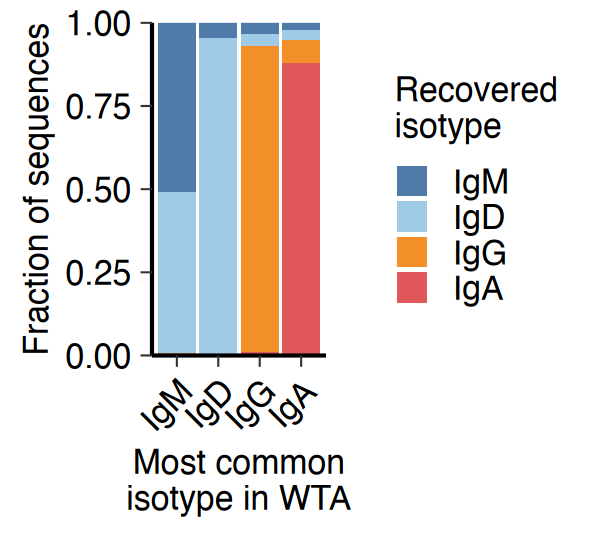

In [46]:
options(repr.plot.width=2,repr.plot.height=1.8,repr.plot.res=300)
df4gg %>% filter(!is.na(BCR)) %>% 
ggplot(aes(x=cDNA,fill=BCR)) + theme_classic()+ 
geom_bar(position='fill')+
scale_y_continuous(expand=c(0,0))+ 
scale_fill_manual(values=c("#507AA8","#A0CBE7" ,"#F28F28", "#E05859"),
                  labels=c('IgM','IgD','IgG','IgA'))+
scale_x_discrete(labels=c('IgM','IgD','IgG','IgA'))+
labs(x = 'Most common\nisotype in WTA' , y = 'Fraction of sequences', fill='Recovered\nisotype') + 
Axis_themes + 
theme(legend.key.size = unit(.3, 'cm'), 
      axis.text.x=element_text(angle=45,hjust=1))

out = 'figures/10x_3p_isotype_bars.pdf'
ggsave(out,device='pdf', height = 1.8, width = 2,
       dpi = 300,useDingbats = FALSE)


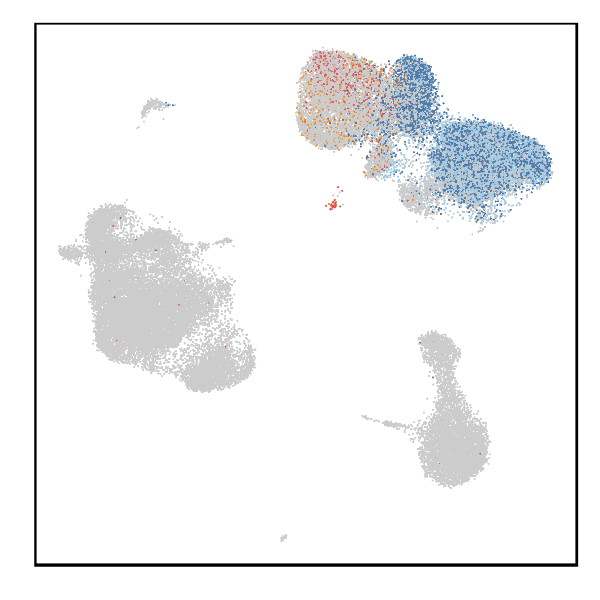

In [26]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = srat@meta.data %>% mutate(ISOTYPE = ifelse(ISOTYPE=='IGHG1/2','IGHG',ISOTYPE))

metadata %>% #arrange(bcelltype) %>%
ggplot(aes(x=UMAP1, y=UMAP2,color=factor(ISOTYPE, levels=c('IGHM','IGHD','IGHG','IGHA'))))+ 
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
scale_color_manual(values=c("#507AA8","#A0CBE7" ,"#F28F28", "#E05859"),na.value = 'grey80')+
UMAP_theme

out = 'figures/10x_3p_uamp_isotype.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

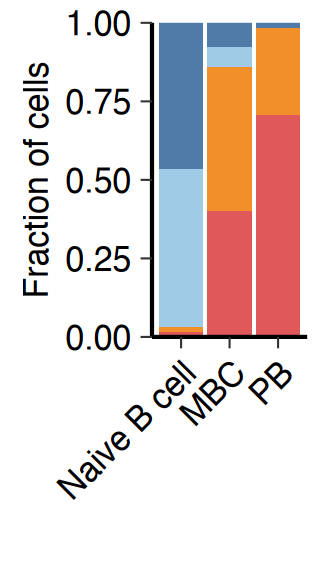

In [58]:
options(repr.plot.width=1.1,repr.plot.height=1.9,repr.plot.res=300)

df4gg = FetchData(srat,c('label','ISOTYPE'))
df4gg = df4gg %>% mutate(ISOTYPE = ifelse(ISOTYPE=='IGHG1/2','IGHG',ISOTYPE)) %>% 
filter(ISOTYPE %in% c('IGHM','IGHD','IGHG','IGHA'), 
       label != 'Non-B cell')

df4gg$ISOTYPE = factor(df4gg$ISOTYPE,levels=c('IGHM','IGHD','IGHG','IGHA'))
df4gg$label = factor(df4gg$label,levels=c('Naive B cell','MBC','PB'))

df4gg %>% 
ggplot(aes(x=label,fill=ISOTYPE)) + theme_classic()+ NoLegend()+
geom_bar(position='fill')+
scale_y_continuous(expand=c(0,0))+ 
scale_fill_manual(values=c("#507AA8","#A0CBE7" ,"#F28F28", "#E05859"), 
                  labels = c ('IgM', 'IgD', 'IgG', 'IgA'))+
labs(x='',y = 'Fraction of cells',fill='Recovered\nisotype')+
Axis_themes + 
theme(legend.key.size = unit(.3, 'cm'),
      axis.text.x=element_text(angle=45,hjust=1))

out = 'figures/10x_3p_isotype_bars2.pdf'
ggsave(out,device='pdf', height = 1.9, width = 1.1,
       dpi = 300,useDingbats = FALSE)

In [99]:
cdna = FetchData(srat,jz.checkgene(srat,'IGHV'), slot='count') %>% 
mutate(cell.id=rownames(.))
cdna$cell.id = str_split_i(cdna$cell.id, '-',1)
cdna = melt(cdna,id.vars = 'cell.id',variable.name = 'cDNA.vgene',value.name = 'cDNA.count')
# keep the v gene with the greatest umi count 
cdna = cdna %>% data.frame() %>% filter(cDNA.count>0) %>% group_by(cell.id) %>% 
arrange(desc(cDNA.count)) %>% slice(1) %>% ungroup() %>% filter(cDNA.count!=1) 
cdna$cDNA.vgene = as.character(cdna$cDNA.vgene)
cdna = cdna%>% mutate(cDNA.vgene = ifelse(cDNA.vgene=='IGHV1-69D','IGHV1-69',cDNA.vgene),
                      cDNA.vgene = ifelse(cDNA.vgene=='IGHV2-70D','IGHV2-70',cDNA.vgene))

In [100]:
bcrseq = heavy.bcr %>% count(cell.id,V_CALL,name = 'bcr.count')
# keep the first v call and remove allele info  
bcrseq = bcrseq %>% mutate(bcr.vgene = str_split_i(V_CALL,'\\*',1))
# keep the v gene with the greatest umi count 
bcrseq = bcrseq %>% filter(cell.id%in%srat$cell.id) %>%
group_by(cell.id) %>% arrange(desc(bcr.count)) %>% slice(1) %>% ungroup() %>% 
filter(bcr.count!=1) %>% 
mutate(bcr.vgene = ifelse(bcr.vgene=='IGHV3-30-3','IGHV3-30',bcr.vgene))
bcrseq$cdna.vgene = cdna$cDNA.vgene[match(bcrseq$cell.id,cdna$cell.id)]


In [101]:
df4gg = bcrseq %>% filter(!is.na(cdna.vgene))

# only keep v gene if they are found in both bcr and cdna
df4gg = df4gg %>% filter(bcr.vgene %in% cdna.vgene) %>% filter(cdna.vgene %in% bcr.vgene)

# keep v genes only if they are seen in more than X cells 
min.cell = 3
genes2keep = df4gg %>% count(bcr.vgene) %>% filter(n>=min.cell) %>% select(bcr.vgene) %>% unlist()
df4gg = df4gg %>% filter(bcr.vgene %in% genes2keep,cdna.vgene %in% genes2keep)

# calculate fraction of identity
df4gg = df4gg %>% group_by(bcr.vgene,cdna.vgene) %>% summarise(n.cdna.vgene = n()) %>% 
mutate(total=sum(n.cdna.vgene),frac=n.cdna.vgene/total) %>% ungroup() 

`summarise()` has grouped output by 'bcr.vgene'. You can override using the
`.groups` argument.


In [102]:
# reshape into matrix for heat map 
df4hmap = df4gg %>% dcast(.,formula = cdna.vgene~bcr.vgene, value.var='frac') %>% 
replace(is.na(.),0)

# Order vgene 
split_strings <- strsplit(df4hmap$cdna.vgene, "-")
before_hyphen <- sapply(split_strings, function(x) x[1])
after_hyphen <- sapply(split_strings, function(x) as.numeric(x[2]))
df4hmap = df4hmap[order(before_hyphen,after_hyphen),]

rownames(df4hmap)=df4hmap$cdna.vgene
df4hmap= df4hmap %>% select(-cdna.vgene)
df4hmap=df4hmap[,rownames(df4hmap)] 

# drop the IGHV from rownames
rownames(df4hmap) = gsub('IGHV','',rownames(df4hmap))
dim(df4hmap)

[1] 23 23

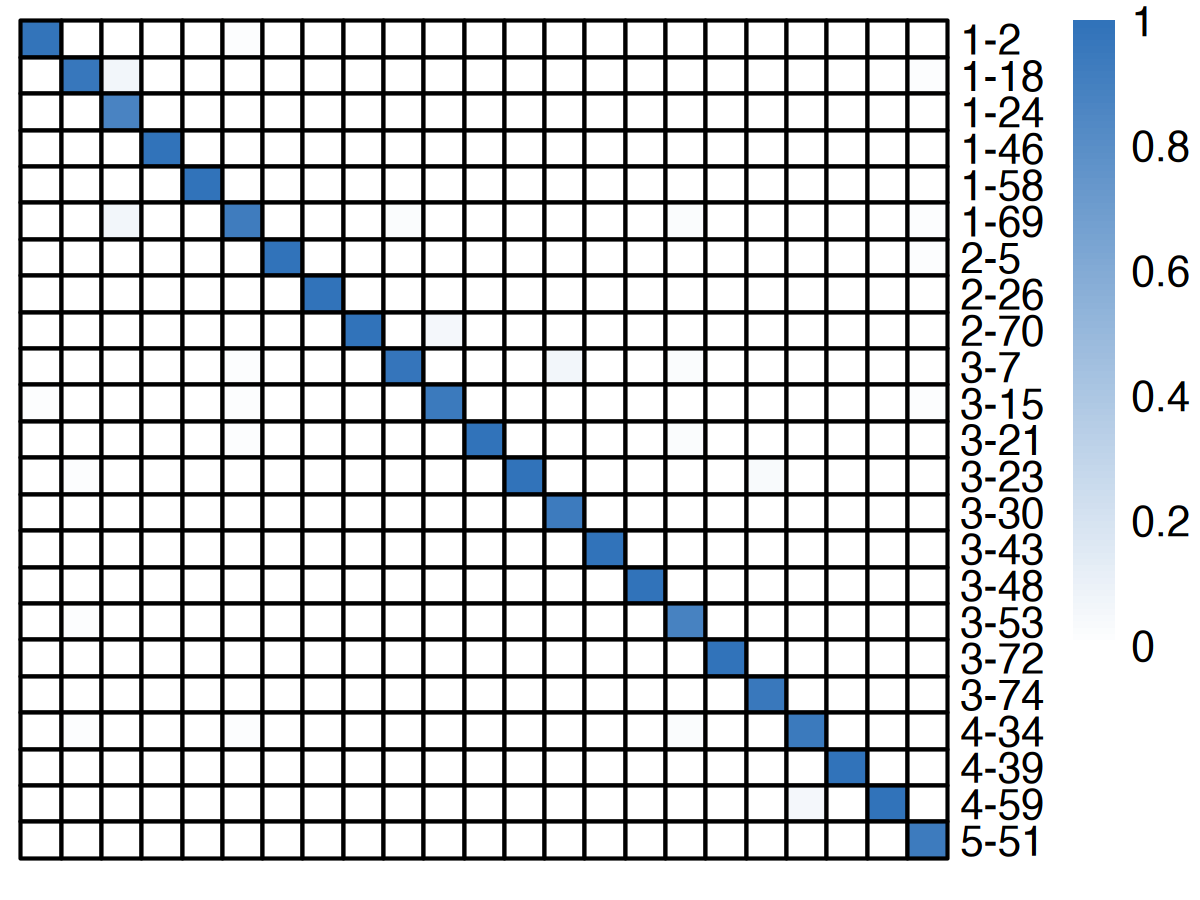

In [103]:
options(repr.plot.width=4, repr.plot.height=3,repr.plot.res=300 )
pheatmap::pheatmap(df4hmap,cluster_rows=FALSE,cluster_cols=FALSE,
                   labels_col = '',border_color = "black",border_width=0.5,
                   color=colorRampPalette(c('white', '#3173BA'))(100))

In [104]:
# filename='figures/IGHV_BCRvscDNA_concordance.pdf'
# pdf(filename, width=4, height=3,colormodel = "cmyk",useDingbats=FALSE, compress=FALSE)
# pheatmap::pheatmap(df4hmap,cluster_rows=FALSE,cluster_cols=FALSE,
#                    labels_col = '',border_color = "black",border_width=0.5,
#                    color=colorRampPalette(c('white', '#3173BA'))(100))
# dev.off()


pdf 
  3

In [39]:
cdna = FetchData(srat,c(jz.checkgene(srat,'IGKV'),jz.checkgene(srat,'IGLV')), slot='count') %>% 
mutate(cell.id=rownames(.))
cdna$cell.id = str_split_i(cdna$cell.id, '-',1)
cdna = melt(cdna,id.vars = 'cell.id',variable.name = 'cDNA.vgene',value.name = 'cDNA.count')
# keep the v gene with the greatest umi count 
cdna = cdna %>% data.frame() %>% filter(cDNA.count>0) %>% group_by(cell.id) %>% 
arrange(desc(cDNA.count)) %>% slice(1) %>% ungroup() %>% filter(cDNA.count!=1) 
cdna$cDNA.vgene = as.character(cdna$cDNA.vgene)


In [40]:
bcrseq = light.bcr %>% count(cell.id,V_CALL,name = 'bcr.count')
# keep the first v call and remove allele info  
bcrseq = bcrseq %>% mutate(bcr.vgene = str_split_i(V_CALL,'\\*',1))
# keep the v gene with the greatest umi count 
bcrseq = bcrseq %>% filter(cell.id%in%srat$cell.id) %>%
group_by(cell.id) %>% arrange(desc(bcr.count)) %>% slice(1) %>% ungroup() %>% 
filter(bcr.count!=1) 

bcrseq$cdna.vgene = cdna$cDNA.vgene[match(bcrseq$cell.id,cdna$cell.id)]


In [41]:
df4gg = bcrseq %>% filter(!is.na(cdna.vgene))

# only keep v gene if they are found in both bcr and cdna
df4gg = df4gg %>% filter(bcr.vgene %in% cdna.vgene) %>% filter(cdna.vgene %in% bcr.vgene)

# keep v genes only if they are seen in more than X cells 
min.cell = 10
genes2keep = df4gg %>% count(bcr.vgene) %>% filter(n>=min.cell) %>% select(bcr.vgene) %>% unlist()
df4gg = df4gg %>% filter(bcr.vgene %in% genes2keep,cdna.vgene %in% genes2keep)

# calculate fraction of identity
df4gg = df4gg %>% group_by(bcr.vgene,cdna.vgene) %>% summarise(n.cdna.vgene = n()) %>% 
mutate(total=sum(n.cdna.vgene),frac=n.cdna.vgene/total) %>% ungroup() 

`summarise()` has grouped output by 'bcr.vgene'. You can override using the
`.groups` argument.


In [42]:
# reshape into matrix for heat map 
df4hmap = df4gg %>% dcast(.,formula = cdna.vgene~bcr.vgene, value.var='frac') %>% 
replace(is.na(.),0)

# Order vgene 
split_strings <- strsplit(df4hmap$cdna.vgene, "-")
before_hyphen <- sapply(split_strings, function(x) x[1])
after_hyphen <- sapply(split_strings, function(x) as.numeric(x[2]))
df4hmap = df4hmap[order(before_hyphen,after_hyphen),]
                       
rownames(df4hmap)=df4hmap$cdna.vgene
df4hmap= df4hmap %>% select(-cdna.vgene)
df4hmap=df4hmap[,rownames(df4hmap)] 

# drop the IGHV from rownames
rownames(df4hmap) = gsub('IGLV|IGKV','',rownames(df4hmap))
dim(df4hmap)

[1] 24 24

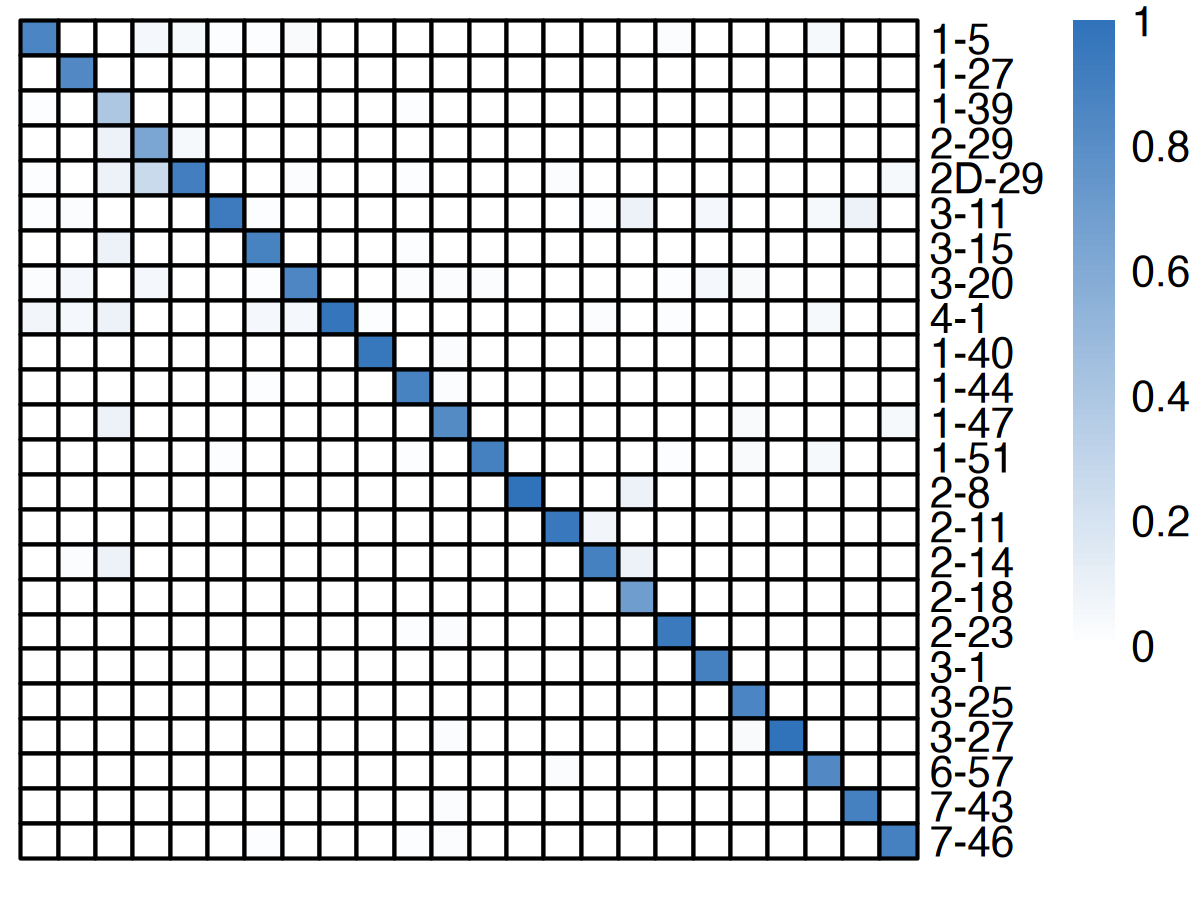

In [43]:
options(repr.plot.width=4, repr.plot.height=3,repr.plot.res=300 )
pheatmap::pheatmap(df4hmap,cluster_rows=FALSE,cluster_cols=FALSE,
                   labels_col = '',border_color = "black",border_width=0.5,
                   color=colorRampPalette(c('white', '#3173BA'))(100))

In [ ]:
# filename='figures/IGKLV_BCRvscDNA_concordance.pdf'
# pdf(filename, width=4, height=3,colormodel = "cmyk",useDingbats=FALSE, compress=FALSE)
# pheatmap::pheatmap(df4hmap,cluster_rows=FALSE,cluster_cols=FALSE,
#                    labels_col = '',border_color = "black",border_width=0.5,
#                    color=colorRampPalette(c('white', '#3173BA'))(100))
# dev.off()


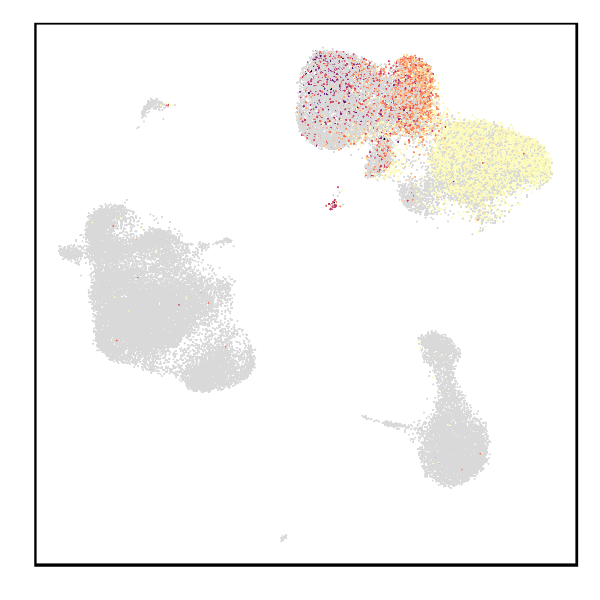

In [28]:
options(repr.plot.width=2,repr.plot.height=2,repr.plot.res=300)

metadata = srat@meta.data %>% mutate(heavy.shm.freq = ifelse(heavy.shm.freq>0.21,0.21,heavy.shm.freq))

metadata %>% 
ggplot(aes(x=UMAP1, y=UMAP2,color=heavy.shm.freq))+ 
geom_point_rast(size = .2, stroke = 0, raster.dpi = 1000) +
scale_color_viridis(option = 1, direction = -1, na.value = 'grey85') +
UMAP_theme

out = 'figures/10x_3p_umap_mutation.pdf'
ggsave(out, height = 1.8, width = 1.8, useDingbats = FALSE)

Warning message:
“Removed 12730 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 12730 rows containing non-finite outside the scale range
(`stat_signif()`).”
Warning message:
“Removed 12730 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 12730 rows containing non-finite outside the scale range
(`stat_signif()`).”


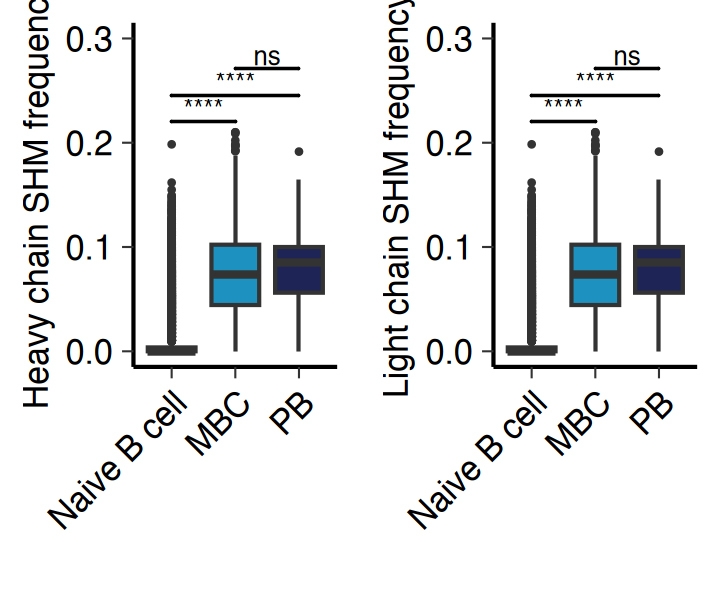

In [64]:
# heavy chain
metadata = srat@meta.data %>% mutate(heavy.shm.freq=ifelse(heavy.shm.freq>0.21,0.21,heavy.shm.freq)) %>% 
filter(label!='Non-B cell')
my.comparison = list(c('Naive B cell','MBC'),c('Naive B cell','PB'),c('MBC','PB')) 
metadata$label = factor(metadata$label, levels=c('Naive B cell','MBC','PB'))
metadata %>% 
ggplot(aes(x=label, y=heavy.shm.freq, fill=label)) + theme_classic() + NoLegend()+
geom_boxplot(outlier.size =.1, size = .355) +
labs(fill='',x='',y='Heavy chain SHM frequency')+
scale_fill_manual(values = c('Naive B cell'='#C8E3B4','MBC'='#1D91C0','PB'='#1E2456')) +
stat_compare_means(method = 'wilcox',comparisons=my.comparison,label='p.signif', tip.length = 0)+
Axis_themes + ylim(0,0.3) +
theme(axis.text.x=element_text(angle=45,hjust=1)) -> g1
g1$layers[[2]]$aes_params$textsize <- 2.1167
# light chain 
metadata = srat@meta.data %>% mutate(light.shm.freq=ifelse(heavy.shm.freq>0.21,0.21,heavy.shm.freq)) %>% 
filter(label!='Non-B cell')
my.comparison = list(c('Naive B cell','MBC'),c('Naive B cell','PB'),c('MBC','PB')) 
metadata$label = factor(metadata$label, levels=c('Naive B cell','MBC','PB'))
metadata %>% 
ggplot(aes(x=label, y=light.shm.freq, fill=label)) + theme_classic() + NoLegend()+
geom_boxplot(outlier.size =.1, size = .355) +
labs(fill='',x='',y='Light chain SHM frequency')+
scale_fill_manual(values = c('Naive B cell'='#C8E3B4','MBC'='#1D91C0','PB'='#1E2456')) +
stat_compare_means(method = 'wilcox',comparisons=my.comparison,label='p.signif', tip.length = 0)+
Axis_themes+ylim(0,0.3) +
theme(axis.text.x=element_text(angle=45,hjust=1)) -> g2
g2$layers[[2]]$aes_params$textsize <- 2.1167

options(repr.plot.width = 2.4,repr.plot.height = 2 )
cowplot::plot_grid(g1,g2)

ggsave('Figures/10x_3p_boxes_mutation.pdf', height = 2, width = 2.4)


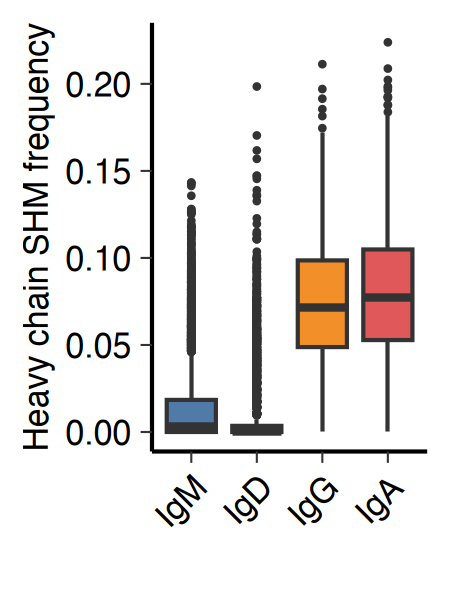

In [30]:
options(repr.plot.width = 1.5,repr.plot.height =2 ,repr.plot.res=300)

metadata = srat@meta.data %>% filter(!is.na(ISOTYPE))%>%
mutate(ISOTYPE = ifelse(ISOTYPE=='IGHG1/2','IGHG',ISOTYPE))
metadata$ISOTYPE = gsub(metadata$ISOTYPE, pattern = 'GH', replacement = 'g')

metadata$ISOTYPE = factor(metadata$ISOTYPE, levels=c('IgM', 'IgD', 'IgG', 'IgA'))

metadata %>% 
ggplot(aes(x=ISOTYPE,y=heavy.shm.freq, fill=ISOTYPE)) + theme_classic()+ NoLegend()+ 
geom_boxplot(outlier.size =.1, size = .355) +
labs(x='',y='Heavy chain SHM frequency') +
scale_fill_manual(values=c("#507AA8","#A0CBE7" ,"#F28F28", "#E05859")) +
Axis_themes+
theme(axis.text.x=element_text(angle=45,hjust=1))

out = 'figures/10x_3p_isotype_mutation.pdf'
ggsave(out,device='pdf', height = 1.8, width = 1.3,
       dpi = 300,useDingbats = FALSE)

In [ ]:
# Recovery probability curves 

In [47]:
# light chain (igl)
df4gg = FetchData(subset(srat,bcelltype %in% c('Naive B cell','Memory B cell','Plasmablast')),
                  c('IGKC','IGLC1','IGLC2','IGLC3','IGLC4','IGLC5','IGLC6','IGLC7'),slot='count')
df4gg$WTA = rowSums(df4gg)

# get scVDJ umis
df4gg$VDJ = srat$light.umi[match(rownames(df4gg), rownames(srat@meta.data))]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0

igl = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGL')

# heavy chain (igh)
df4gg = FetchData(subset(srat,bcelltype %in% c('Naive B cell','Memory B cell','Plasmablast')),
                  c('IGHM','IGHD','IGHG4','IGHG2','IGHG1','IGHG3','IGHA1','IGHA2','IGHE'),slot='count')
df4gg$WTA = apply(df4gg, 1, max)

# get scVDJ umis
df4gg$VDJ = srat$heavy.umi[match(rownames(df4gg), rownames(srat@meta.data))]
df4gg$VDJ[is.na(df4gg$VDJ)] = 0

igh = df4gg %>% select(WTA, VDJ) %>% mutate(chain = 'IGH')

# combine with igh
out.df = rbind(igh,igl) %>% 
mutate(exp=str_split_i(rownames(.),'_',1),
       project='10x 3`GEX')
head(out.df)
table(out.df$chain)


,WTA,VDJ,chain,exp,project
,<dbl>,<dbl>,<chr>,<chr>,<chr>
H1_AAACCCAAGGTCCGAA-1,7,0,IGH,H1,10x 3`GEX
H1_AAACCCAAGTAGACCG-1,4,0,IGH,H1,10x 3`GEX
H1_AAACCCACATGCGGTC-1,4,0,IGH,H1,10x 3`GEX
H1_AAACCCAGTCTCGCGA-1,8,2,IGH,H1,10x 3`GEX
H1_AAACCCAGTTTGACAC-1,2,0,IGH,H1,10x 3`GEX
H1_AAACCCATCCACCTGT-1,1,0,IGH,H1,10x 3`GEX



  IGH   IGL 
25694 25694 

In [48]:
write.csv(out.df,'Zhang_10X_3GEX_300.csv')

In [ ]:
# go to "cDNA_vs_VDJ.ipynb" and combine with other datasets 